# TRANSFORMACIONES DE VECINDAD

En las operaciones de vecindad se incluye cualquier operación en la que participen los pixeles vecinos del que se está transformando realmente, como las operaciones de filtrado.

# Nociones y Propiedades de Vecindad: 

* **ENTORNO DE VECINDAD**: E4, Ed y E8

<div style="text-align: center;">
    <img src="img_expo/trans_vec.jpeg" alt="Imagen" style="width: 30%;"/>
</div>

* **CONECTIVIDAD**: 
Forma en que los pixeles están conectados entre sí dentro de una vecindad
<div style="text-align: center;">
    <img src="img_expo/conectividad-entre-pixeles.png" alt="Imagen" style="width: 30%;"/>

</div>

* **CAMINOS DE ADYACENCIA**

<div style="text-align: center;">
    <img src="img_expo/adya.jpeg" alt="Imagen1" style="width: 25%;"/>
</div>

<div style="text-align: center;">
    <img src="img_expo/camino_adya.jpg" alt="Imagen2" style="width: 30%;"/>
</div>

# Operaciones de Vecindad
* # Filtro Paso Bajo

<div style="text-align: center;">
    <img src="img_expo/PB1.jpeg" alt="Imagen 1" style="width: 25%; display: inline-block;"/>
    <img src="img_expo/PB2.jpeg" alt="Imagen 2" style="width: 25%; display: inline-block;"/>
</div>


In [2]:
import cv2
import numpy as np

img = cv2.imread('image02.jpg',0)
fil,col = img.shape

k2=np.array([[1,1,1],[1,2,1],[1,1,1]])

k2=k2/(np.sum(k2))

img_pb2=np.zeros((fil-2,col-2),np.uint8)

for j in range(1, fil - 1):
    for i in range(1, col - 1):
        a=img[j-1,i-1]
        b=img[j,i-1]
        c=img[j+1,i-1]
        d=img[j-1,i]
        e=img[j,i]
        f=img[j+1,i]
        g=img[j-1,i+1]
        h=img[j,i+1]
        k=img[j+1,i+1]
        venc=[[a,d,g],[b,e,h],[c,f,k]]
        prod=venc*k2
        img_pb2[j-1, i-1] = np.sum(prod)

cv2.imshow('Imagen Original',img)
cv2.imshow('Filtro PB2',img_pb2)

cv2.waitKey(0)
cv2.destroyAllWindows()

* # Filtro Paso Alto

<div style="text-align: center;">
    <img src="img_expo/pa1.jpeg" alt="Imagen 4" style="width: 25%; display: inline-block;"/>
    <img src="img_expo/pa2.jpeg" alt="Imagen 5" style="width: 25%; display: inline-block;"/>
</div>


In [1]:
import cv2
import numpy as np

img = cv2.imread('image02.jpg',0)
fil,col = img.shape

k1=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

img_pa1=np.zeros((fil-2,col-2),np.uint8)

for j in range(1, fil - 1):
    for i in range(1, col - 1):
        a=img[j-1,i-1]
        b=img[j,i-1]
        c=img[j+1,i-1]
        d=img[j-1,i]
        e=img[j,i]
        f=img[j+1,i]
        g=img[j-1,i+1]
        h=img[j,i+1]
        k=img[j+1,i+1]

        venc=[[a,d,g],[b,e,h],[c,f,k]]
        
        prod=venc*k1
        img_pa1[j-1, i-1] = np.sum(prod)

cv2.imshow('Imagen Original',img)
cv2.imshow('Filtro PA1',img_pa1)

cv2.waitKey(0)
cv2.destroyAllWindows()

* # Suavizado

> **Promediado del entorno de vecindad**

<div style="text-align: center;">
    <img src="img_expo/Diapositiva1.jpg" alt="Imagen 8" style="width: 30%; display: inline-block;"/>
</div>

<div style="text-align: center;">
    <img src="img_expo/Diapositiva3.jpg" alt="Imagen 9" style="width: 30%; display: inline-block;"/>
</div>


In [2]:
import cv2
import numpy as np

img = cv2.imread('img_py/rad2.jpg',0)

fil,col = img.shape

img_med=np.zeros((fil-2,col-2),np.uint8)

for j in range(1,fil-1):
    for i in range(1,col-1):
        a=img[j-1,i-1]
        b=img[j,i-1]
        c=img[j+1,i-1]
        d=img[j-1,i]
        e=img[j,i]
        f=img[j+1,i]
        g=img[j-1,i+1]
        h=img[j,i+1]
        k=img[j+1,i+1]

        venc=[a,b,c,d,e,f,g,h,k]
        #Determinación de media
        pix=np.mean(venc)
        #Sobreescribimos los pixeles
        img_med[j-1,i-1]=pix

cv2.imshow('Imagen Original',img)
cv2.imshow('Filtro de media',img_med)

cv2.waitKey(0)
cv2.destroyAllWindows()

> **Filtrado de la mediana**

<div style="text-align: center;">
    <img src="img_expo/Diapositiva4.jpg" alt="Imagen 8" style="width: 50%; display: inline-block;"/>
</div>

In [3]:
import cv2
import numpy as np

img = cv2.imread('img_py/rad2.jpg',0)

fil,col = img.shape

img_med=np.zeros((fil-2,col-2),np.uint8)

for j in range(1,fil-1):
    for i in range(1,col-1):
        a=img[j-1,i-1]
        b=img[j,i-1]
        c=img[j+1,i-1]
        d=img[j-1,i]
        e=img[j,i]
        f=img[j+1,i]
        g=img[j-1,i+1]
        h=img[j,i+1]
        k=img[j+1,i+1]

        A_p=[[a,b,c,d,e,f,g,h,k]]
        #Determinación de mediana
        pix=np.median(A_p)
        #Sobreescribimos los pixeles
        img_med[j-1,i-1]=pix

cv2.imshow('Imagen Original',img)
cv2.imshow('Filtro de media',img_med)

cv2.waitKey(0)
cv2.destroyAllWindows()

> **Filtrado de máximos y mínimos**

<div style="text-align: center;">
    <img src="img_expo/Diapositiva5.jpg" alt="Imagen 8" style="width: 50%; display: inline-block;"/>
</div>

In [4]:
import cv2
import numpy as np

img = cv2.imread('img_py/rad2.jpg',0)

fil,col = img.shape

img_max=np.zeros((fil-2,col-2),np.uint8)
img_min=np.zeros((fil-2,col-2),np.uint8)

for j in range(1,fil-1):
    for i in range(1,col-1):
        a=img[j-1,i-1]
        b=img[j,i-1]
        c=img[j+1,i-1]
        d=img[j-1,i]
        e=img[j,i]
        f=img[j+1,i]
        g=img[j-1,i+1]
        h=img[j,i+1]
        k=img[j+1,i+1]

        venc=[[a,b,c,d,e,f,g,h,k]]
         
        #Determinación de máximos y mínimos
        maximo=np.amax(venc)
        minimo=np.amin(venc)
        #Sobreescribimos los pixeles maximos y minimos
        img_max[j-1,i-1]=maximo
        img_min[j-2,i-2]=minimo

cv2.imshow('Imagen Original',img)
cv2.imshow('Filtro de minimos',img_min)
cv2.imshow('Filtro de maximos',img_max)

cv2.waitKey(0)
cv2.destroyAllWindows()

> **Filtro de Moda**

<div style="text-align: center;">
    <img src="img_expo/Diapositiva6.jpg" alt="Imagen 8" style="width: 50%; display: inline-block;"/>
</div>

In [5]:
import cv2
import numpy as np
from scipy.stats import mode

img = cv2.imread('img_py/rad2.jpg',0)

fil,col = img.shape

img_mod=np.zeros((fil-2,col-2),np.uint8)

for j in range(1,fil-1):
    for i in range(1,col-1):
        a=img[j-1,i-1]
        b=img[j,i-1]
        c=img[j+1,i-1]
        d=img[j-1,i]
        e=img[j,i]
        f=img[j+1,i]
        g=img[j-1,i+1]
        h=img[j,i+1]
        k=img[j+1,i+1]

        A_p=[a,b,c,d,e,f,g,h,k]
        #Determinación de mediana
        pix,co=mode(A_p)
        #Sobreescribimos los pixeles
        img_mod[j-1,i-1]=pix

cv2.imshow('Imagen Original',img)
cv2.imshow('Filtro de moda',img_mod)

cv2.waitKey(0)
cv2.destroyAllWindows()

> **Filtro Gaussiano**

<div style="text-align: center;">
    <img src="img_expo/Diapositiva2.jpg" alt="Imagen 8" style="width: 30%; display: inline-block;"/>
</div>

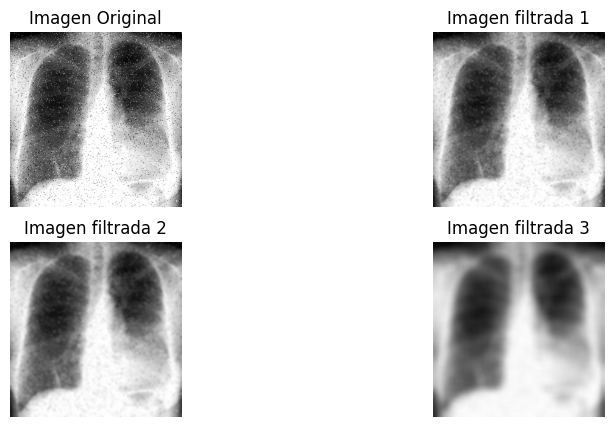

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img_py/rad2.jpg')

fm1=cv2.GaussianBlur(img,(5,5),1)
fm2=cv2.GaussianBlur(img,(5,5),8)
fm3=cv2.GaussianBlur(img,(15,15),10)

img1='Imagen filtrada 1'
img2='Imagen filtrada 2'
img3='Imagen filtrada 3'

# Visualizar la imagen suavizada con filtro gaussiano
titles = ['Imagen Original',img1,img2,img3]
images = [img, fm1, fm2, fm3]

plt.figure(figsize=(10, 5))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# EXTTRACCIÓN DE BORDES

<div style="text-align: center;">
    <img src="img_expo/extr_bord.jpeg" alt="Imagen 8" style="width: 50%; display: inline-block;"/>
</div>

> **Filtro Sobel**

<div style="text-align: center;">
    <img src="img_expo/sobel.jpeg" alt="Imagen 8" style="width: 50%; display: inline-block;"/>
    <img src="img_expo/grad.jpeg" alt="Imagen 8" style="width: 30%; display: inline-block;"/>
</div>

In [11]:
import cv2
import numpy as np

# Cargar la imagen
img = cv2.imread('img_py/image03.jpg',0)

# Definir los kernels del filtro de Sobel
Kx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

Ky = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Aplicar el filtro de Sobel en la dirección x
Gx = cv2.filter2D(img, -1, Kx)

# Aplicar el filtro de Sobel en la dirección y
Gy = cv2.filter2D(img, -1, Ky)

# Combinar las dos imágenes filtradas para obtener la imagen final
img_filtra = cv2.bitwise_or(Gx, Gy)

# Mostrar las imágenes original y filtrada
cv2.imshow("Imagen Original", img)
cv2.imshow("Imagen Filtrada", img_filtra)
cv2.waitKey(0)
cv2.destroyAllWindows()

> **Filtro de Prewitt**

In [13]:
import cv2
import numpy as np

# Cargar la imagen
img = cv2.imread('img_py/image03.jpg',0)

# Definir los kernels del filtro de Sobel
Kx = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

Ky = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

# Aplicar el filtro de Sobel en la dirección x
Gx = cv2.filter2D(img, -1, Kx)

# Aplicar el filtro de Sobel en la dirección y
Gy = cv2.filter2D(img, -1, Ky)

# Combinar las dos imágenes filtradas para obtener la imagen final
imagen_filtrada = cv2.bitwise_or(Gx, Gy)

# Mostrar las imágenes original y filtrada
cv2.imshow("Imagen Original", img)
cv2.imshow("Imagen Filtrada", imagen_filtrada)
cv2.waitKey(0)
cv2.destroyAllWindows()